In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!pip install pandas

In [19]:
books = pd.read_csv('BX-Books.csv', sep=';', error_bad_lines=False, encoding="latin-1")
books.columns = ['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher', 'Image-Url-S', 'Image-Url-M', 'Image-Url-L']
users = pd.read_csv('BX-Users.csv', sep=';', error_bad_lines=False, encoding="latin-1")
users.columns = ['User-ID', 'Location', 'Age']
ratings = pd.read_csv('BX-Book-Ratings.csv', sep=';', error_bad_lines=False, encoding="latin-1")
ratings.columns = ['User-ID', 'ISBN', 'Book-Rating']

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'
/home/bhabuk/.virtualenvs/datascience/lib/python3.5/site-packages/IPython/

In [25]:
print(ratings.shape)
print(list(ratings.columns))

(1149780, 3)
['User-ID', 'ISBN', 'Book-Rating']


In [26]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [24]:
plt.rc("font",size=15)
ratings.columns.Book-Rating.value_counts(sort=False).plt(kind='bar')
plt.title("rating Distributation \n")
plt.xlabel('ratings')
plt.ylabel('Counts')
plt.savefig('system1.png',bbox_inches='tight')
plt.show()

AttributeError: 'Index' object has no attribute 'Book'

In [27]:
print(users.shape)
print(list(users.columns))

(278858, 3)
['User-ID', 'Location', 'Age']


In [28]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


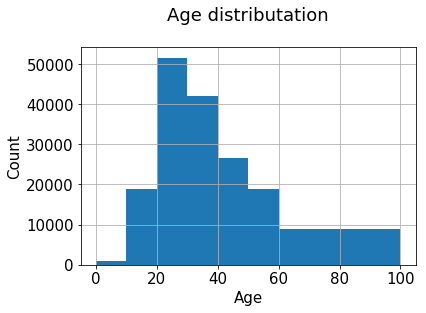

In [29]:
## hist means histograms

users.Age.hist(bins=[0,10,20,30,40,50,60,100])
plt.title('Age distributation\n')
plt.xlabel('Age')
plt.ylabel('Count')
plt.savefig('system2.png',bbox_inches='tight')
plt.show()

In [30]:
rating_count=pd.DataFrame(ratings.groupby('ISBN')['Book-Rating'].count())
rating_count.sort_values('Book-Rating',ascending=False).head()


,Book-Rating
ISBN,
0971880107,2502
0316666343,1295
0385504209,883
0060928336,732
0312195516,723


In [31]:
print(books.shape)
print(list(books.columns))

(271360, 8)
['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher', 'Image-Url-S', 'Image-Url-M', 'Image-Url-L']


In [50]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-Url-S,Image-Url-M,Image-Url-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


# Recommendations based on correlations


In [47]:
average_rating = pd.DataFrame(ratings.groupby('ISBN')['Book-Rating'].mean())
average_rating['ratingCount'] = pd.DataFrame(ratings.groupby('ISBN')['Book-Rating'].count())
average_rating.sort_values('ratingCount',ascending=False).head()

,Book-Rating,ratingCount
ISBN,,
0971880107,1.019584,2502
0316666343,4.468726,1295
0385504209,4.652322,883
0060928336,3.448087,732
0312195516,4.334716,723


In [49]:
counts1 = ratings('User-ID').value_counts()
ratings = ratings[ratings['User-ID'].isin(counts1[counts1 >=200].index)]
counts = ratings['Book-Rating'].value_counts()
ratings =ratings[ratings['Book-Rating'].isin(counts[counts >=100].index)]

TypeError: 'DataFrame' object is not callable

In [40]:
## Rating Matrix

ratings_pivot=ratings.pivot(index='User-ID',columns='ISBN').Book-Rating
UserID= ratings_pivot.index
ISBN= ratings_pivot.columns
print(ratings_pivot.shape)
ratings_pivot.head()

MemoryError: 